In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
passengers = pd.read_csv("AirPassenger.csv")

In [127]:
passengers.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [128]:
passengers.dtypes

Year-Month    object
Pax            int64
dtype: object

In [129]:
passengers['Year-Month'] = pd.to_datetime(passengers['Year-Month'], format = '%Y-%b')

In [130]:
passengers.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [131]:
ts_passengers = passengers.set_index('Year-Month')
ts_passengers.dtypes

Pax    int64
dtype: object

In [132]:
ts_passengers.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [133]:
ts_passengers['Pax']

Year-Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Pax, Length: 144, dtype: int64

<Axes: xlabel='Year-Month'>

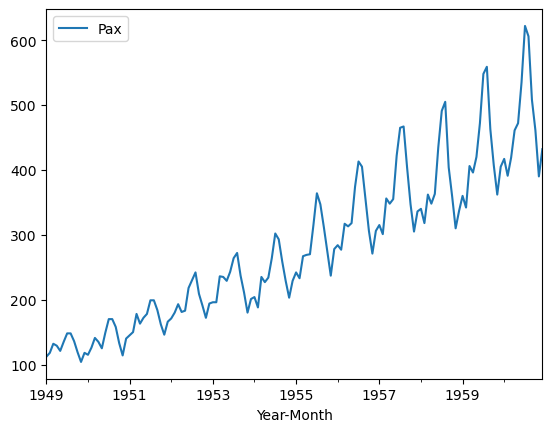

In [134]:
ts_passengers.plot.line()

In [135]:
pip install yfinance

In [136]:
import yfinance as yf

In [137]:
ticker = 'GOOG'
google = yf.download(ticker, period = '3mo')

[*********************100%***********************]  1 of 1 completed


In [138]:
ts_google = google[('Close', 'GOOG')]
ts_google.head(10)

Date
2024-12-09    177.100006
2024-12-10    186.529999
2024-12-11    196.710007
2024-12-12    193.630005
2024-12-13    191.380005
2024-12-16    198.160004
2024-12-17    197.119995
2024-12-18    190.149994
2024-12-19    189.699997
2024-12-20    192.960007
Name: (Close, GOOG), dtype: float64

### Method 1

In [140]:
ts_google.index.min(), ts_google.index.max()

(Timestamp('2024-12-09 00:00:00'), Timestamp('2025-03-07 00:00:00'))

In [141]:
dates = pd.date_range(start='2024-12-09', end='2025-03-07', freq='1d')

In [142]:
df_google = pd.DataFrame(index = dates)

In [143]:
df_google['close'] = ts_google
df_google.head(10)

,close
2024-12-09,177.100006
2024-12-10,186.529999
2024-12-11,196.710007
2024-12-12,193.630005
2024-12-13,191.380005
2024-12-14,NaN
2024-12-15,NaN
2024-12-16,198.160004
2024-12-17,197.119995
2024-12-18,190.149994


In [144]:
ts_google_new = df_google['close']
ts_google_new.head(10)

2024-12-09    177.100006
2024-12-10    186.529999
2024-12-11    196.710007
2024-12-12    193.630005
2024-12-13    191.380005
2024-12-14           NaN
2024-12-15           NaN
2024-12-16    198.160004
2024-12-17    197.119995
2024-12-18    190.149994
Freq: D, Name: close, dtype: float64

### Method 2

In [146]:
ts_google.resample(rule='1ME').sum()

Date
2024-12-31    3081.270035
2025-01-31    3936.660034
2025-02-28    3536.390015
2025-03-31     866.220016
Freq: ME, Name: (Close, GOOG), dtype: float64

In [147]:
ts_google.resample(rule='1d').mean().head(10)

Date
2024-12-09    177.100006
2024-12-10    186.529999
2024-12-11    196.710007
2024-12-12    193.630005
2024-12-13    191.380005
2024-12-14           NaN
2024-12-15           NaN
2024-12-16    198.160004
2024-12-17    197.119995
2024-12-18    190.149994
Freq: D, Name: (Close, GOOG), dtype: float64

In [148]:
ts_google_new = ts_google.resample(rule='1d').mean()

<Axes: xlabel='Date'>

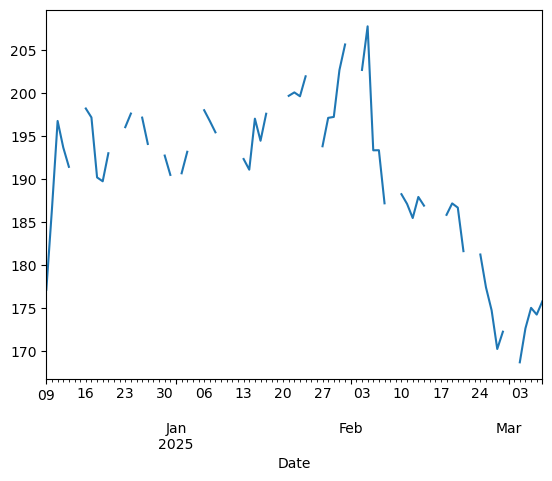

In [149]:
ts_google_new.plot.line()

In [150]:
ts_google_new.mean()

190.34233500162762

In [151]:
ts_google_imputed = ts_google_new.ffill()
#ts_google_imputed = ts_google_new.interpolate()
ts_google_imputed.head(10)

Date
2024-12-09    177.100006
2024-12-10    186.529999
2024-12-11    196.710007
2024-12-12    193.630005
2024-12-13    191.380005
2024-12-14    191.380005
2024-12-15    191.380005
2024-12-16    198.160004
2024-12-17    197.119995
2024-12-18    190.149994
Freq: D, Name: (Close, GOOG), dtype: float64

<Axes: xlabel='Date'>

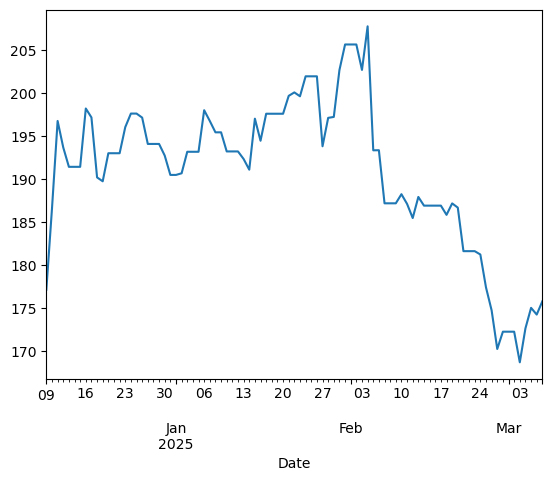

In [152]:
ts_google_imputed.plot.line()

### Scope for prediction using linear models

### Auto-correltation

In [155]:
df = pd.DataFrame(ts_passengers)
df['Pax_lag1'] = df['Pax'].shift(1)

In [156]:
df

,Pax,Pax_lag1
Year-Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0
...,...,...
1960-08-01,606,622.0
1960-09-01,508,606.0
1960-10-01,461,508.0


In [157]:
df['Pax_lag2'] = df['Pax'].shift(2)
df

,Pax,Pax_lag1,Pax_lag2
Year-Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,112.0
1949-04-01,129,132.0,118.0
1949-05-01,121,129.0,132.0
...,...,...,...
1960-08-01,606,622.0,535.0
1960-09-01,508,606.0,622.0
1960-10-01,461,508.0,606.0


In [158]:
df.corr()

,Pax,Pax_lag1,Pax_lag2
Pax,1.000000,0.960195,0.895675
Pax_lag1,0.960195,1.000000,0.960249
Pax_lag2,0.895675,0.960249,1.000000


In [159]:
for i in range(1,20):
    df[f'Pax_lag{i}'] = df['Pax'].shift(i)
df.corr()

,Pax,Pax_lag1,Pax_lag2,Pax_lag3,Pax_lag4,Pax_lag5,Pax_lag6,Pax_lag7,Pax_lag8,Pax_lag9,Pax_lag10,Pax_lag11,Pax_lag12,Pax_lag13,Pax_lag14,Pax_lag15,Pax_lag16,Pax_lag17,Pax_lag18,Pax_lag19
Pax,1.000000,0.960195,0.895675,0.837395,0.797735,0.785943,0.783919,0.784592,0.792215,0.827852,0.882713,0.949702,0.990527,0.948107,0.875448,0.811466,0.769449,0.755819,0.748752,0.745500
Pax_lag1,0.960195,1.000000,0.960249,0.894473,0.836002,0.799965,0.789839,0.783123,0.782117,0.789786,0.825743,0.881441,0.949238,0.990491,0.947868,0.873978,0.809895,0.772589,0.758554,0.746990
Pax_lag2,0.895675,0.960249,1.000000,0.961133,0.896597,0.844427,0.810070,0.793150,0.783274,0.782019,0.788745,0.824712,0.881472,0.949684,0.990476,0.948515,0.876648,0.820705,0.782270,0.761404
Pax_lag3,0.837395,0.894473,0.961133,1.000000,0.960920,0.899075,0.846777,0.807324,0.789193,0.779140,0.778509,0.786193,0.821849,0.879716,0.950149,0.990352,0.948198,0.880003,0.821756,0.778513
Pax_lag4,0.797735,0.836002,0.896597,0.960920,1.000000,0.962171,0.898945,0.842121,0.802115,0.783723,0.775250,0.776281,0.782339,0.819330,0.881160,0.950134,0.990073,0.949890,0.878362,0.815969
Pax_lag5,0.785943,0.799965,0.844427,0.899075,0.962171,1.000000,0.959887,0.894424,0.838784,0.797732,0.782939,0.777582,0.775028,0.782602,0.826832,0.884734,0.950972,0.989436,0.946493,0.873256
Pax_lag6,0.783919,0.789839,0.810070,0.846777,0.898945,0.959887,1.000000,0.959373,0.894852,0.837280,0.799273,0.787776,0.778091,0.776915,0.791575,0.830397,0.883838,0.947442,0.988754,0.946279
Pax_lag7,0.784592,0.783123,0.793150,0.807324,0.842121,0.894424,0.959373,1.000000,0.959009,0.892632,0.835987,0.799379,0.784874,0.775845,0.779189,0.789233,0.824790,0.878387,0.945637,0.988333
Pax_lag8,0.792215,0.782117,0.783274,0.789193,0.802115,0.838784,0.894852,0.959009,1.000000,0.957989,0.891095,0.834689,0.795786,0.781514,0.775211,0.775403,0.783309,0.821224,0.877444,0.944492
Pax_lag9,0.827852,0.789786,0.782019,0.779140,0.783723,0.797732,0.837280,0.892632,0.957989,1.000000,0.957653,0.890590,0.831804,0.792594,0.780728,0.771336,0.769381,0.778594,0.818353,0.874379


<Axes: >

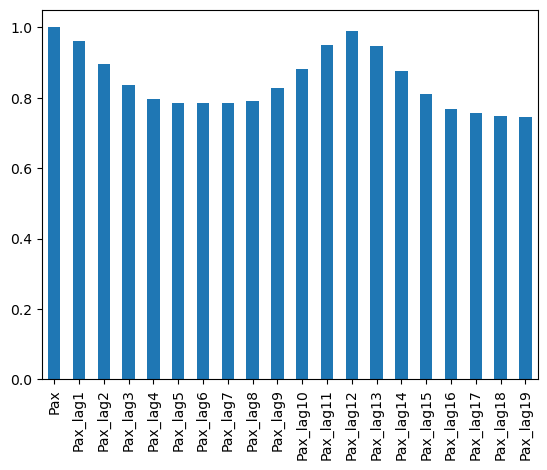

In [160]:
df.corr()['Pax'].plot.bar()

In [161]:
df = pd.DataFrame({'x': np.random.randn(1000)})

In [162]:
for i in range(1,20):
    df[f'x_lag{i}'] = df['x'].shift(i)

<Axes: >

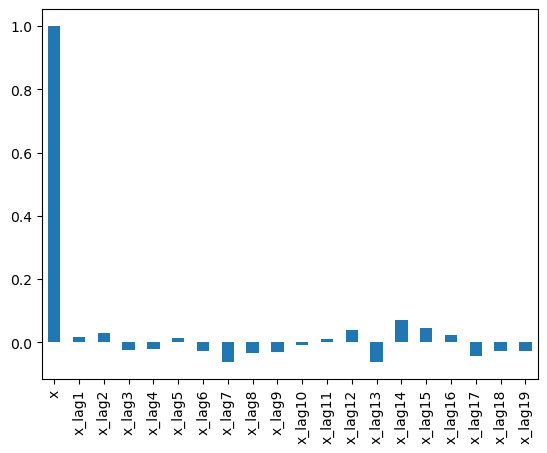

In [163]:
df.corr()['x'].plot.bar()

In [164]:
from statsmodels.graphics.tsaplots import plot_acf

In [165]:
df = pd.DataFrame({'x' : np.random.randn(1000)})

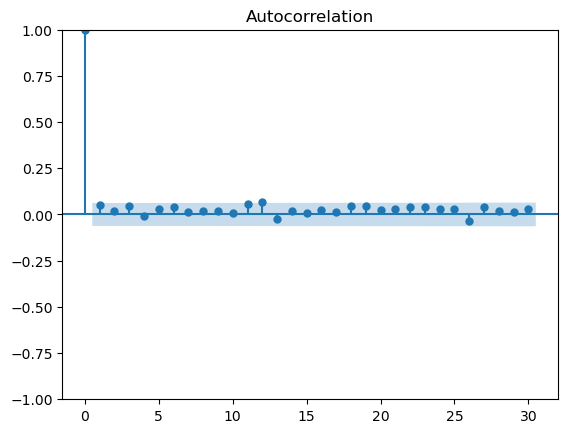

In [166]:
plot_acf(df['x']);

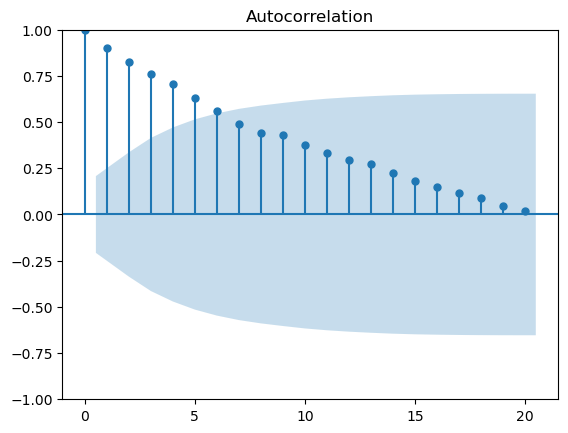

In [167]:
plot_acf(ts_google_imputed);

### Train test data

In [169]:
ts_passengers.shape

(144, 1)

In [170]:
ts_passengers_train = ts_passengers[:100]
ts_passengers_test = ts_passengers[100:]

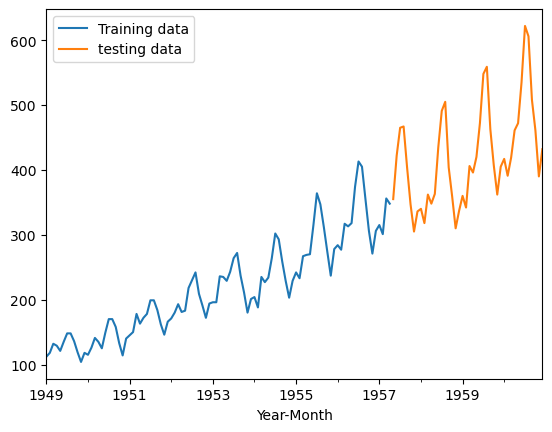

In [171]:
fig, ax = plt.subplots()
ts_passengers_train.plot.line(ax = ax)
ts_passengers_test.plot.line(ax = ax)
plt.legend(['Training data','testing data'])
plt.show()

In [172]:
ts_passengers.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Decomposition of components

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

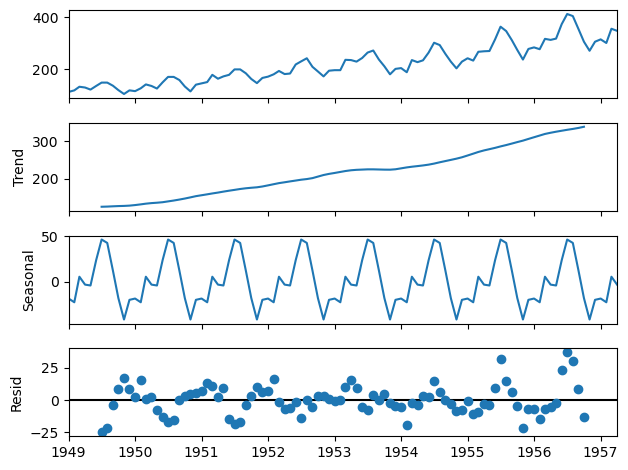

In [175]:
ts_comp = seasonal_decompose(
    ts_passengers_train, model = 'additive', period = 12
)
ts_comp.plot();

### Moving Average

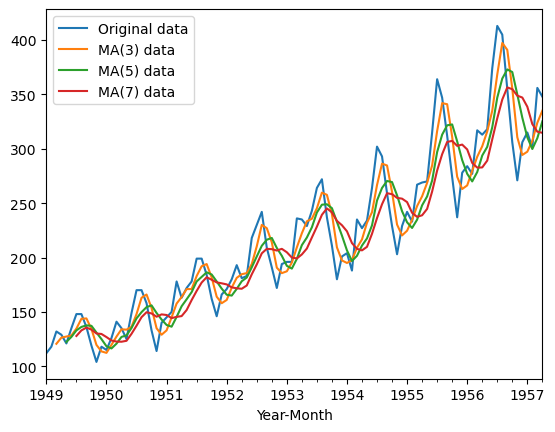

In [177]:
df_ma = pd.DataFrame(ts_passengers_train)
df_ma['ma_w3'] = df_ma['Pax'].rolling(3).mean()
df_ma['ma_w5'] = df_ma['Pax'].rolling(5).mean()
df_ma['ma_w7'] = df_ma['Pax'].rolling(7).mean()
df_ma['Pax'].plot.line()
df_ma['ma_w3'].plot.line()
df_ma['ma_w5'].plot.line()
df_ma['ma_w7'].plot.line()
plt.legend(['Original data','MA(3) data','MA(5) data','MA(7) data'])
plt.show()

### Differencing data

### Simple exponential Smoothing

In [252]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [254]:
model_ses = SimpleExpSmoothing(
    ts_passengers_train,
    initialization_method='estimated',
).fit(optimized=True)
model_ses.summary()

C:\Users\manju\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Pax,No. Observations:,100
Model:,SimpleExpSmoothing,SSE,55088.000
Optimized:,True,AIC,635.152
Trend:,None,BIC,640.362
Seasonal:,None,AICC,635.573
Seasonal Periods:,None,Date:,"Sun, 09 Mar 2025"
Box-Cox:,False,Time:,15:23:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,112.00000,l.0,True


In [256]:
ts_passengers_pred = model_ses.forecast(steps=len(ts_passengers_test))

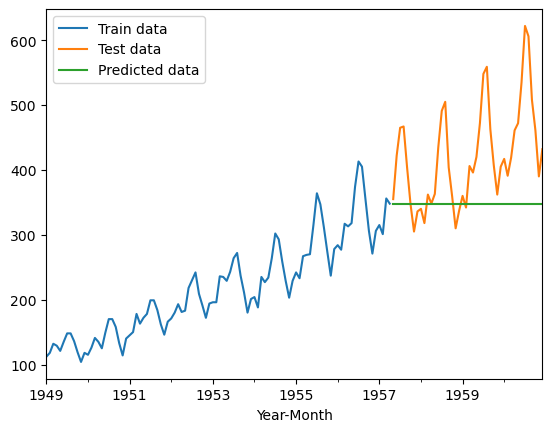

In [264]:
fig, ax = plt.subplots()
ts_passengers_train.plot.line(ax=ax)
ts_passengers_test.plot.line(ax=ax)
ts_passengers_pred.plot.line(ax=ax)
plt.legend(['Train data','Test data','Predicted data'])

### Double Exponential Smoothing

In [267]:
from statsmodels.tsa.api import Holt

In [269]:
model_holt = Holt(
    ts_passengers_train,
    initialization_method='estimated',
).fit(optimized=True)
#model_ses.summary()

C:\Users\manju\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [275]:
ts_passengers_pred = model_holt.forecast(steps=len(ts_passengers_test))

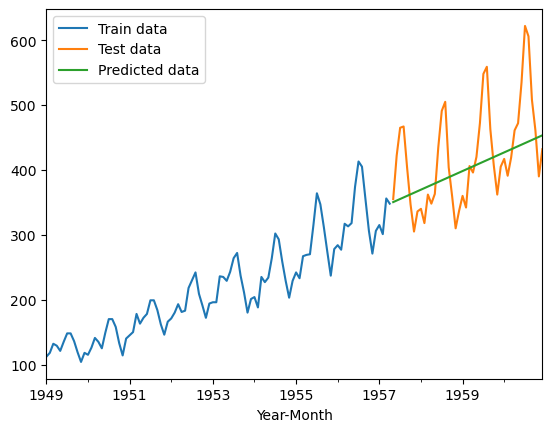

In [273]:
fig, ax = plt.subplots()
ts_passengers_train.plot.line(ax=ax)
ts_passengers_test.plot.line(ax=ax)
ts_passengers_pred.plot.line(ax=ax)
plt.legend(['Train data','Test data','Predicted data'])

### Thiple Exponential Smoothing

In [278]:
from statsmodels.tsa.api import ExponentialSmoothing

In [280]:
model_holt__winters = ExponentialSmoothing(
    ts_passengers_train,
    initialization_method='estimated',
    trend = "add",
    seasonal = 'add'
).fit(optimized=True)
#model_ses.summary()

C:\Users\manju\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


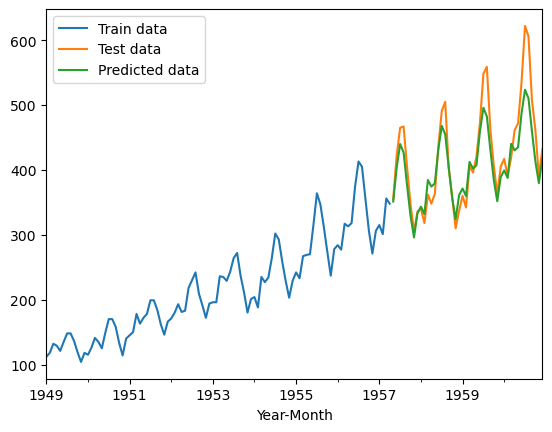

In [283]:
ts_passengers_pred = model_holt__winters.forecast(steps=len(ts_passengers_test))
fig, ax = plt.subplots()
ts_passengers_train.plot.line(ax=ax)
ts_passengers_test.plot.line(ax=ax)
ts_passengers_pred.plot.line(ax=ax)
plt.legend(['Train data','Test data','Predicted data'])

In [285]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(ts_passengers_test, ts_passengers_pred)
rmse

33.6286431080119

C:\Users\manju\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


31.86242909414656

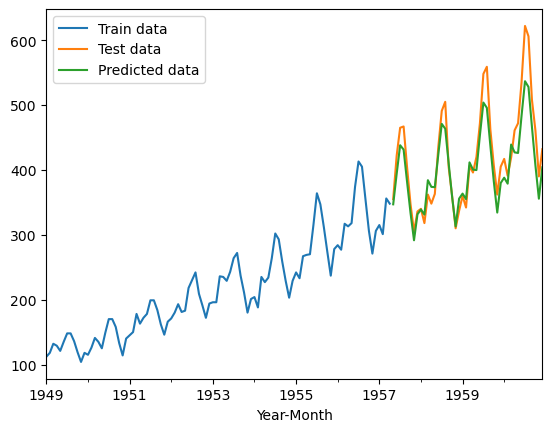

In [305]:
model_holt__winters = ExponentialSmoothing(
    ts_passengers_train,
    initialization_method='estimated',
    trend = "additive",
    seasonal = 'multiplicative'
).fit(optimized=True)
#model_ses.summary()
ts_passengers_pred = model_holt__winters.forecast(steps=len(ts_passengers_test))
fig, ax = plt.subplots()
ts_passengers_train.plot.line(ax=ax)
ts_passengers_test.plot.line(ax=ax)
ts_passengers_pred.plot.line(ax=ax)
plt.legend(['Train data','Test data','Predicted data'])
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(ts_passengers_test, ts_passengers_pred)
rmse

In [ ]:
Introduction to Statistical learning
